# Horse vs. Human dataset with TF/keras

## 1. Load the data
- download, unzip and load the data
- visualize a sample

## 2. Use `ImageDataGenerator` to prepare the dataset for the model

## 3. Create a model and train

Source: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=4PIP1rkmeAYS

In [132]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
from ml_helpers.scraping import *
from ml_helpers.image import *
from ml_helpers.tf import *

In [136]:
PATH = "data\\horse-or-human.zip"
download_dataset("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip", PATH)
data_dir = open_zip(PATH)

PATH_VALID = "data\\validation-horse-or-human.zip"
download_dataset("https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip", PATH_VALID)
data_dir_valid = open_zip(PATH_VALID)

In [137]:
train_horse_names = os.listdir(os.path.join(f"{data_dir}\\horses"))
train_human_names = os.listdir(os.path.join(f"{data_dir}\\humans"))

valid_horse_names = os.listdir(os.path.join(f"{data_dir_valid}\\horses"))
valid_human_names = os.listdir(os.path.join(f"{data_dir_valid}\\humans"))
print(train_horse_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']


Load a random image

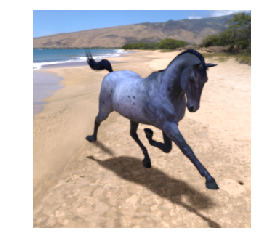

In [138]:
random_img = load_image_from_path(f"{data_dir}\\horses\\{train_horse_names[42]}")
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(random_img)
plt.show()

In [139]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1/255)
train_gen = gen.flow_from_directory(
    data_dir, target_size=(300,300), batch_size=128, class_mode='binary')

valid_gen = gen.flow_from_directory(
    data_dir_valid, target_size=(300,300), batch_size=128, class_mode='binary')

Found 1033 images belonging to 3 classes.
Found 256 images belonging to 2 classes.


## 3. Create a model and train

In [165]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [166]:
from tensorflow.keras.optimizers import RMSprop

callback = StopWhenAccReachedCallback(loss=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

%time history = model.fit_generator(\
    train_gen, steps_per_epoch=8, epochs=15, verbose=1, callbacks = [callback])

Epoch 1/15
9/9 [==============================] - 49s 5s/step - loss: 0.6397 - acc: 0.5721
Epoch 2/15
9/9 [==============================] - 51s 6s/step - loss: 0.5509 - acc: 0.7870
Epoch 3/15
9/9 [==============================] - 49s 5s/step - loss: 0.4249 - acc: 0.8470
Epoch 4/15
9/9 [==============================] - 49s 5s/step - loss: 0.3217 - acc: 0.8935
Epoch 5/15
9/9 [==============================] - 50s 6s/step - loss: 0.2513 - acc: 0.8984
Epoch 6/15
9/9 [==============================] - 49s 5s/step - loss: 0.2212 - acc: 0.9129
Epoch 7/15
9/9 [==============================] - 50s 6s/step - loss: 0.1474 - acc: 0.9632
Epoch 8/15
9/9 [==============================] - 49s 5s/step - loss: 0.1517 - acc: 0.9584
Epoch 9/15
9/9 [==============================] - 52s 6s/step - loss: 0.1412 - acc: 0.9593
Epoch 10/15
9/9 [==============================] - 57s 6s/step - loss: 0.1039 - acc: 0.9622
Epoch 11/15
9/9 [==============================] - 60s 7s/step - loss: 0.0822 - acc: 0.98

In [169]:
VAL_PATH = "data\\horse-or-human\\valid\\"
from tensorflow.keras.preprocessing import image
 
image_names = ["human1.jpg", "horse1.jpg", "human2.jpg", "horse2.jpg", "human_or_is_it_3.jpg"]
images = []
predictions = []
for img_name in image_names:
    img = image.load_img(f"{VAL_PATH}{img_name}", target_size=(300,300))
    images.append(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x, batch_size=10)
    predictions.append("human" if classes[0] > 0.5 else "horse")

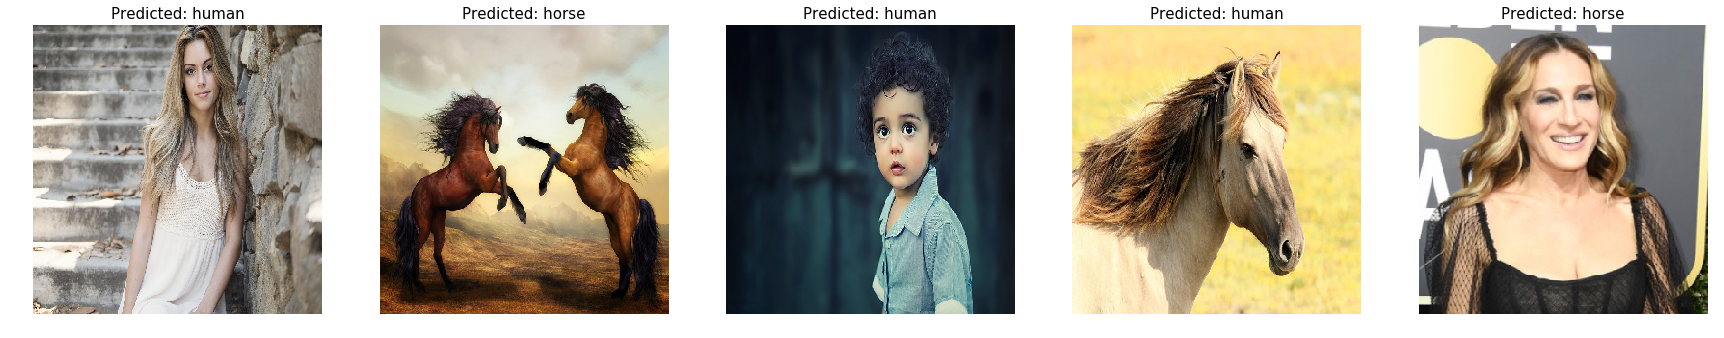

In [170]:
fig, ax = plt.subplots(1, 5, figsize=(30,30))

for idx, ax_ in enumerate(ax):
    ax_.grid(False)
    ax_.imshow(images[idx])
    ax_.set_title(f"Predicted: {predictions[idx]}", fontsize=15)
    ax_.axis('off')
plt.show()